In [88]:
import pandas as pd
import numpy as np
import os
from env import host, user, password

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.cluster import KMeans

pd.options.display.float_format = '{:20,.2f}'.format

# Acquire and Prep

In [2]:
import wrangle_zillow as wr

In [3]:
df = wr.get_zillow_data()
df.head()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,logerror,transactiondate
0,14297519,1727539,NaN,NaN,NaN,3.50,4.00,NaN,NaN,3.50,...,"1,023,282.00","2,016.00","537,569.00","11,013.72",NaN,NaN,"60,590,630,072,012.00",0,0.03,2017-01-01
1,17052889,1387261,NaN,NaN,NaN,1.00,2.00,NaN,NaN,1.00,...,"464,000.00","2,016.00","376,000.00","5,672.48",NaN,NaN,"61,110,010,023,006.00",1,0.06,2017-01-01
2,14186244,11677,NaN,NaN,NaN,2.00,3.00,NaN,NaN,2.00,...,"564,778.00","2,016.00","479,489.00","6,488.30",NaN,NaN,"60,590,218,022,012.00",2,0.01,2017-01-01
3,12177905,2288172,NaN,NaN,NaN,3.00,4.00,NaN,8.00,3.00,...,"145,143.00","2,016.00","36,225.00","1,777.51",NaN,NaN,"60,373,001,001,006.00",3,-0.10,2017-01-01
4,10887214,1970746,1.00,NaN,NaN,3.00,3.00,NaN,8.00,3.00,...,"119,407.00","2,016.00","45,726.00","1,533.89",NaN,NaN,"60,371,236,012,000.00",4,0.01,2017-01-01


In [4]:
pd.set_option("display.max_columns", None)

In [5]:
df.head()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,logerror,transactiondate
0,14297519,1727539,NaN,NaN,NaN,3.50,4.00,NaN,NaN,3.50,NaN,NaN,"3,100.00","3,100.00",NaN,NaN,NaN,NaN,"6,059.00",NaN,3.00,2.00,633.00,NaN,NaN,"33,634,931.00","-117,869,207.00","4,506.00",NaN,NaN,NaN,NaN,NaN,122,261.00,NaN,"60,590,630.07","53,571.00","1,286.00",NaN,"96,978.00",0.00,NaN,1.00,NaN,NaN,NaN,NaN,"1,998.00",NaN,NaN,"485,713.00","1,023,282.00","2,016.00","537,569.00","11,013.72",NaN,NaN,"60,590,630,072,012.00",0,0.03,2017-01-01
1,17052889,1387261,NaN,NaN,NaN,1.00,2.00,NaN,NaN,1.00,NaN,"1,465.00","1,465.00","1,465.00",NaN,NaN,"1,465.00",NaN,"6,111.00",1.00,1.00,1.00,0.00,NaN,NaN,"34,449,266.00","-119,281,531.00","12,647.00",NaN,NaN,NaN,NaN,NaN,1110,261.00,NaN,"61,110,010.02","13,091.00","2,061.00",NaN,"97,099.00",5.00,NaN,NaN,NaN,NaN,NaN,NaN,"1,967.00",1.00,NaN,"88,000.00","464,000.00","2,016.00","376,000.00","5,672.48",NaN,NaN,"61,110,010,023,006.00",1,0.06,2017-01-01
2,14186244,11677,NaN,NaN,NaN,2.00,3.00,NaN,NaN,2.00,NaN,NaN,"1,243.00","1,243.00",NaN,NaN,NaN,NaN,"6,059.00",NaN,2.00,2.00,440.00,NaN,NaN,"33,886,168.00","-117,823,170.00","8,432.00",1.00,NaN,NaN,NaN,1.00,122,261.00,NaN,"60,590,218.02","21,412.00","1,286.00",NaN,"97,078.00",6.00,NaN,NaN,NaN,NaN,NaN,NaN,"1,962.00",1.00,NaN,"85,289.00","564,778.00","2,016.00","479,489.00","6,488.30",NaN,NaN,"60,590,218,022,012.00",2,0.01,2017-01-01
3,12177905,2288172,NaN,NaN,NaN,3.00,4.00,NaN,8.00,3.00,NaN,NaN,"2,376.00","2,376.00",NaN,NaN,NaN,NaN,"6,037.00",NaN,3.00,NaN,NaN,NaN,2.00,"34,245,180.00","-118,240,722.00","13,038.00",1.00,NaN,NaN,NaN,1.00,0101,261.00,LCR110000*,"60,373,001.00","396,551.00","3,101.00",NaN,"96,330.00",0.00,NaN,NaN,NaN,1.00,NaN,NaN,"1,970.00",NaN,NaN,"108,918.00","145,143.00","2,016.00","36,225.00","1,777.51",NaN,NaN,"60,373,001,001,006.00",3,-0.10,2017-01-01
4,10887214,1970746,1.00,NaN,NaN,3.00,3.00,NaN,8.00,3.00,NaN,NaN,"1,312.00","1,312.00",NaN,NaN,NaN,NaN,"6,037.00",NaN,3.00,NaN,NaN,NaN,2.00,"34,185,120.00","-118,414,640.00","278,581.00",1.00,NaN,NaN,NaN,1.00,010C,266.00,LAR3,"60,371,236.01","12,447.00","3,101.00","268,548.00","96,451.00",0.00,NaN,NaN,NaN,1.00,NaN,NaN,"1,964.00",NaN,NaN,"73,681.00","119,407.00","2,016.00","45,726.00","1,533.89",NaN,NaN,"60,371,236,012,000.00",4,0.01,2017-01-01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72241 entries, 0 to 72240
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      72241 non-null  int64  
 1   id                            72241 non-null  int64  
 2   airconditioningtypeid         23079 non-null  float64
 3   architecturalstyletypeid      207 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   72241 non-null  float64
 6   bedroomcnt                    72241 non-null  float64
 7   buildingclasstypeid           0 non-null      float64
 8   buildingqualitytypeid         45080 non-null  float64
 9   calculatedbathnbr             71987 non-null  float64
 10  decktypeid                    612 non-null    float64
 11  finishedfloor1squarefeet      6032 non-null   float64
 12  calculatedfinishedsquarefeet  72055 non-null  float64
 13  f

In [7]:
def remove_columns(df, cols_to_remove):  
    df = df.drop(columns=cols_to_remove)
    return df

In [8]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .75):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [9]:
def data_prep(df, cols_to_remove=[], prop_required_column=.5, prop_required_row=.75):
    df = remove_columns(df, cols_to_remove)
    df = handle_missing_values(df, prop_required_column, prop_required_row)
    return df

In [10]:
# columns removed for having less than 50% of the values
df = data_prep(df, cols_to_remove=['airconditioningtypeid','architecturalstyletypeid','basementsqft','buildingclasstypeid','decktypeid','finishedfloor1squarefeet','finishedsquarefeet13','finishedsquarefeet15','finishedsquarefeet50','finishedsquarefeet6','fireplacecnt','garagecarcnt','garagetotalsqft','hashottuborspa','poolcnt','poolsizesum','pooltypeid10','pooltypeid2','pooltypeid7','regionidneighborhood','storytypeid','threequarterbathnbr','typeconstructiontypeid','yardbuildingsqft17','yardbuildingsqft26','numberofstories','fireplaceflag','taxdelinquencyflag','taxdelinquencyyear'], prop_required_column=.5, prop_required_row=.75)
df.head()

,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror,transactiondate
0,14297519,1727539,3.50,4.00,NaN,3.50,"3,100.00","3,100.00","6,059.00",3.00,NaN,"33,634,931.00","-117,869,207.00","4,506.00",122,261.00,NaN,"60,590,630.07","53,571.00","1,286.00","96,978.00",0.00,NaN,"1,998.00","485,713.00","1,023,282.00","2,016.00","537,569.00","11,013.72","60,590,630,072,012.00",0,0.03,2017-01-01
1,17052889,1387261,1.00,2.00,NaN,1.00,"1,465.00","1,465.00","6,111.00",1.00,NaN,"34,449,266.00","-119,281,531.00","12,647.00",1110,261.00,NaN,"61,110,010.02","13,091.00","2,061.00","97,099.00",5.00,NaN,"1,967.00","88,000.00","464,000.00","2,016.00","376,000.00","5,672.48","61,110,010,023,006.00",1,0.06,2017-01-01
2,14186244,11677,2.00,3.00,NaN,2.00,"1,243.00","1,243.00","6,059.00",2.00,NaN,"33,886,168.00","-117,823,170.00","8,432.00",122,261.00,NaN,"60,590,218.02","21,412.00","1,286.00","97,078.00",6.00,NaN,"1,962.00","85,289.00","564,778.00","2,016.00","479,489.00","6,488.30","60,590,218,022,012.00",2,0.01,2017-01-01
3,12177905,2288172,3.00,4.00,8.00,3.00,"2,376.00","2,376.00","6,037.00",3.00,2.00,"34,245,180.00","-118,240,722.00","13,038.00",0101,261.00,LCR110000*,"60,373,001.00","396,551.00","3,101.00","96,330.00",0.00,1.00,"1,970.00","108,918.00","145,143.00","2,016.00","36,225.00","1,777.51","60,373,001,001,006.00",3,-0.10,2017-01-01
4,10887214,1970746,3.00,3.00,8.00,3.00,"1,312.00","1,312.00","6,037.00",3.00,2.00,"34,185,120.00","-118,414,640.00","278,581.00",010C,266.00,LAR3,"60,371,236.01","12,447.00","3,101.00","96,451.00",0.00,1.00,"1,964.00","73,681.00","119,407.00","2,016.00","45,726.00","1,533.89","60,371,236,012,000.00",4,0.01,2017-01-01


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72097 entries, 0 to 72240
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      72097 non-null  int64  
 1   id                            72097 non-null  int64  
 2   bathroomcnt                   72097 non-null  float64
 3   bedroomcnt                    72097 non-null  float64
 4   buildingqualitytypeid         45080 non-null  float64
 5   calculatedbathnbr             71987 non-null  float64
 6   calculatedfinishedsquarefeet  72055 non-null  float64
 7   finishedsquarefeet12          71875 non-null  float64
 8   fips                          72097 non-null  float64
 9   fullbathcnt                   71987 non-null  float64
 10  heatingorsystemtypeid         46697 non-null  float64
 11  latitude                      72097 non-null  float64
 12  longitude                     72097 non-null  float64
 13  l

In [12]:
df = df.drop(df.columns[1], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72097 entries, 0 to 72240
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      72097 non-null  int64  
 1   bathroomcnt                   72097 non-null  float64
 2   bedroomcnt                    72097 non-null  float64
 3   buildingqualitytypeid         45080 non-null  float64
 4   calculatedbathnbr             71987 non-null  float64
 5   calculatedfinishedsquarefeet  72055 non-null  float64
 6   finishedsquarefeet12          71875 non-null  float64
 7   fips                          72097 non-null  float64
 8   fullbathcnt                   71987 non-null  float64
 9   heatingorsystemtypeid         46697 non-null  float64
 10  latitude                      72097 non-null  float64
 11  longitude                     72097 non-null  float64
 12  lotsizesquarefeet             64007 non-null  float64
 13  p

In [13]:
# look at the following columns to fill values: buildingqualitytypeid, calculatedbathnbr, calculatedfinishedsquarefeet, finishedsquarefeet12, fullbathcnt, heatingorsystemtypeid, 
# replaced nulls with mode
df["buildingqualitytypeid"].fillna(8.00, inplace = True)

In [14]:
# replaced nulls with mode since we can't really have a fraction of a bathroom other than .5
df["calculatedbathnbr"].fillna(2.00, inplace = True)

In [15]:
# since the mode is 1200, the mean is 1750, and the 50% quartile is 1510, I'll go with 1510 to replace the few nulls we have
df["calculatedfinishedsquarefeet"].fillna(1510.00, inplace = True)


In [16]:
# replaced with 50% quartile 1510
df["finishedsquarefeet12"].fillna(1510.00, inplace = True)

In [17]:
# replacing with mode
df["fullbathcnt"].fillna(2.00, inplace = True)


In [18]:
# replaced with mode of 2 since that type of systemid is most common. 
df["heatingorsystemtypeid"].fillna(2.00, inplace = True)


In [19]:
# look at the following columns to fill values: lotsizesquarefeet, propertyzoningdesc, regionidcity, regionidzip, unitcnt, yearbuilt,structuretaxvaluedollarcnt, 
#replaced with mode
df["lotsizesquarefeet"].fillna(6000.00, inplace = True)

In [20]:
# dropped because it was missing too many nulls that should be unique. 
df = df.drop(columns='propertyzoningdesc')
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror,transactiondate
0,14297519,3.50,4.00,8.00,3.50,"3,100.00","3,100.00","6,059.00",3.00,2.00,"33,634,931.00","-117,869,207.00","4,506.00",122,261.00,"60,590,630.07","53,571.00","1,286.00","96,978.00",0.00,NaN,"1,998.00","485,713.00","1,023,282.00","2,016.00","537,569.00","11,013.72","60,590,630,072,012.00",0,0.03,2017-01-01
1,17052889,1.00,2.00,8.00,1.00,"1,465.00","1,465.00","6,111.00",1.00,2.00,"34,449,266.00","-119,281,531.00","12,647.00",1110,261.00,"61,110,010.02","13,091.00","2,061.00","97,099.00",5.00,NaN,"1,967.00","88,000.00","464,000.00","2,016.00","376,000.00","5,672.48","61,110,010,023,006.00",1,0.06,2017-01-01
2,14186244,2.00,3.00,8.00,2.00,"1,243.00","1,243.00","6,059.00",2.00,2.00,"33,886,168.00","-117,823,170.00","8,432.00",122,261.00,"60,590,218.02","21,412.00","1,286.00","97,078.00",6.00,NaN,"1,962.00","85,289.00","564,778.00","2,016.00","479,489.00","6,488.30","60,590,218,022,012.00",2,0.01,2017-01-01
3,12177905,3.00,4.00,8.00,3.00,"2,376.00","2,376.00","6,037.00",3.00,2.00,"34,245,180.00","-118,240,722.00","13,038.00",0101,261.00,"60,373,001.00","396,551.00","3,101.00","96,330.00",0.00,1.00,"1,970.00","108,918.00","145,143.00","2,016.00","36,225.00","1,777.51","60,373,001,001,006.00",3,-0.10,2017-01-01
4,10887214,3.00,3.00,8.00,3.00,"1,312.00","1,312.00","6,037.00",3.00,2.00,"34,185,120.00","-118,414,640.00","278,581.00",010C,266.00,"60,371,236.01","12,447.00","3,101.00","96,451.00",0.00,1.00,"1,964.00","73,681.00","119,407.00","2,016.00","45,726.00","1,533.89","60,371,236,012,000.00",4,0.01,2017-01-01


In [21]:
# drop rows with null for regionidcity, regionidzip, yearbuilt, structuretaxvaluedollarcnt since its under 2000 values missing. (will do last)
# both mean and mode for unitcnt are 1 so we'll replace nulls with 1
df["unitcnt"].fillna(1.00, inplace = True)

In [22]:
# drops rows with nulls since so few are missing (less than 100) structuretaxvaluedollarcnt
df.structuretaxvaluedollarcnt.describe(), df.structuretaxvaluedollarcnt.mode()

(count              72,016.00
 mean              188,131.09
 std               231,894.20
 min                    44.00
 25%                83,328.00
 50%               134,870.50
 75%               216,242.75
 max            11,421,790.00
 Name: structuretaxvaluedollarcnt, dtype: float64,
 0             100,000.00
 dtype: float64)

In [23]:
# look at the following columns to fill values: taxvaluedollarcnt, landtaxvaluedollarcnt, taxamount, censustractandblock
df.taxvaluedollarcnt.describe()
#drop the 1 row

count              72,096.00
mean              489,460.25
std               663,049.12
min                 1,000.00
25%               204,160.00
50%               356,000.00
75%               566,926.00
max            49,061,236.00
Name: taxvaluedollarcnt, dtype: float64

In [24]:
df.landtaxvaluedollarcnt.describe()
#drop the 1 row

count              72,096.00
mean              301,537.92
std               500,340.46
min                   161.00
25%                83,421.75
50%               203,141.00
75%               367,425.50
max            48,952,198.00
Name: landtaxvaluedollarcnt, dtype: float64

In [25]:
df.taxamount.describe()
#drop the few rows

count              72,092.00
mean                5,966.32
std                 7,730.31
min                    19.92
25%                 2,679.23
50%                 4,400.08
75%                 6,848.97
max               586,639.30
Name: taxamount, dtype: float64

In [26]:
df.censustractandblock.describe()
#drop rows with nulls and make object

count                71,882.00
mean     60,503,497,480,601.85
std       1,589,819,003,054.10
min      60,371,011,101,000.00
25%      60,374,002,053,566.75
50%      60,376,211,044,003.50
75%      60,590,524,173,014.00
max     483,030,105,084,015.00
Name: censustractandblock, dtype: float64

In [27]:
df.shape

(72097, 31)

In [28]:
df = df.dropna()
df.shape

(70441, 31)

In [29]:
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror,transactiondate
0,14297519,3.50,4.00,8.00,3.50,"3,100.00","3,100.00","6,059.00",3.00,2.00,"33,634,931.00","-117,869,207.00","4,506.00",122,261.00,"60,590,630.07","53,571.00","1,286.00","96,978.00",0.00,1.00,"1,998.00","485,713.00","1,023,282.00","2,016.00","537,569.00","11,013.72","60,590,630,072,012.00",0,0.03,2017-01-01
1,17052889,1.00,2.00,8.00,1.00,"1,465.00","1,465.00","6,111.00",1.00,2.00,"34,449,266.00","-119,281,531.00","12,647.00",1110,261.00,"61,110,010.02","13,091.00","2,061.00","97,099.00",5.00,1.00,"1,967.00","88,000.00","464,000.00","2,016.00","376,000.00","5,672.48","61,110,010,023,006.00",1,0.06,2017-01-01
2,14186244,2.00,3.00,8.00,2.00,"1,243.00","1,243.00","6,059.00",2.00,2.00,"33,886,168.00","-117,823,170.00","8,432.00",122,261.00,"60,590,218.02","21,412.00","1,286.00","97,078.00",6.00,1.00,"1,962.00","85,289.00","564,778.00","2,016.00","479,489.00","6,488.30","60,590,218,022,012.00",2,0.01,2017-01-01
3,12177905,3.00,4.00,8.00,3.00,"2,376.00","2,376.00","6,037.00",3.00,2.00,"34,245,180.00","-118,240,722.00","13,038.00",0101,261.00,"60,373,001.00","396,551.00","3,101.00","96,330.00",0.00,1.00,"1,970.00","108,918.00","145,143.00","2,016.00","36,225.00","1,777.51","60,373,001,001,006.00",3,-0.10,2017-01-01
4,10887214,3.00,3.00,8.00,3.00,"1,312.00","1,312.00","6,037.00",3.00,2.00,"34,185,120.00","-118,414,640.00","278,581.00",010C,266.00,"60,371,236.01","12,447.00","3,101.00","96,451.00",0.00,1.00,"1,964.00","73,681.00","119,407.00","2,016.00","45,726.00","1,533.89","60,371,236,012,000.00",4,0.01,2017-01-01


In [30]:
df.logerror

0                       0.03
1                       0.06
2                       0.01
3                      -0.10
4                       0.01
                ...         
72236                   0.02
72237                   0.01
72238                   0.04
72239                   0.01
72240                  -0.20
Name: logerror, Length: 70441, dtype: float64

In [31]:
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror,transactiondate
0,14297519,3.50,4.00,8.00,3.50,"3,100.00","3,100.00","6,059.00",3.00,2.00,"33,634,931.00","-117,869,207.00","4,506.00",122,261.00,"60,590,630.07","53,571.00","1,286.00","96,978.00",0.00,1.00,"1,998.00","485,713.00","1,023,282.00","2,016.00","537,569.00","11,013.72","60,590,630,072,012.00",0,0.03,2017-01-01
1,17052889,1.00,2.00,8.00,1.00,"1,465.00","1,465.00","6,111.00",1.00,2.00,"34,449,266.00","-119,281,531.00","12,647.00",1110,261.00,"61,110,010.02","13,091.00","2,061.00","97,099.00",5.00,1.00,"1,967.00","88,000.00","464,000.00","2,016.00","376,000.00","5,672.48","61,110,010,023,006.00",1,0.06,2017-01-01
2,14186244,2.00,3.00,8.00,2.00,"1,243.00","1,243.00","6,059.00",2.00,2.00,"33,886,168.00","-117,823,170.00","8,432.00",122,261.00,"60,590,218.02","21,412.00","1,286.00","97,078.00",6.00,1.00,"1,962.00","85,289.00","564,778.00","2,016.00","479,489.00","6,488.30","60,590,218,022,012.00",2,0.01,2017-01-01
3,12177905,3.00,4.00,8.00,3.00,"2,376.00","2,376.00","6,037.00",3.00,2.00,"34,245,180.00","-118,240,722.00","13,038.00",0101,261.00,"60,373,001.00","396,551.00","3,101.00","96,330.00",0.00,1.00,"1,970.00","108,918.00","145,143.00","2,016.00","36,225.00","1,777.51","60,373,001,001,006.00",3,-0.10,2017-01-01
4,10887214,3.00,3.00,8.00,3.00,"1,312.00","1,312.00","6,037.00",3.00,2.00,"34,185,120.00","-118,414,640.00","278,581.00",010C,266.00,"60,371,236.01","12,447.00","3,101.00","96,451.00",0.00,1.00,"1,964.00","73,681.00","119,407.00","2,016.00","45,726.00","1,533.89","60,371,236,012,000.00",4,0.01,2017-01-01


In [32]:
# look for duplicates
df.parcelid.duplicated().sum()

165

In [33]:
df.shape

(70441, 31)

In [34]:
df = df.drop_duplicates(subset='parcelid')

In [35]:
df.shape

(70276, 31)

In [36]:
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror,transactiondate
0,14297519,3.50,4.00,8.00,3.50,"3,100.00","3,100.00","6,059.00",3.00,2.00,"33,634,931.00","-117,869,207.00","4,506.00",122,261.00,"60,590,630.07","53,571.00","1,286.00","96,978.00",0.00,1.00,"1,998.00","485,713.00","1,023,282.00","2,016.00","537,569.00","11,013.72","60,590,630,072,012.00",0,0.03,2017-01-01
1,17052889,1.00,2.00,8.00,1.00,"1,465.00","1,465.00","6,111.00",1.00,2.00,"34,449,266.00","-119,281,531.00","12,647.00",1110,261.00,"61,110,010.02","13,091.00","2,061.00","97,099.00",5.00,1.00,"1,967.00","88,000.00","464,000.00","2,016.00","376,000.00","5,672.48","61,110,010,023,006.00",1,0.06,2017-01-01
2,14186244,2.00,3.00,8.00,2.00,"1,243.00","1,243.00","6,059.00",2.00,2.00,"33,886,168.00","-117,823,170.00","8,432.00",122,261.00,"60,590,218.02","21,412.00","1,286.00","97,078.00",6.00,1.00,"1,962.00","85,289.00","564,778.00","2,016.00","479,489.00","6,488.30","60,590,218,022,012.00",2,0.01,2017-01-01
3,12177905,3.00,4.00,8.00,3.00,"2,376.00","2,376.00","6,037.00",3.00,2.00,"34,245,180.00","-118,240,722.00","13,038.00",0101,261.00,"60,373,001.00","396,551.00","3,101.00","96,330.00",0.00,1.00,"1,970.00","108,918.00","145,143.00","2,016.00","36,225.00","1,777.51","60,373,001,001,006.00",3,-0.10,2017-01-01
4,10887214,3.00,3.00,8.00,3.00,"1,312.00","1,312.00","6,037.00",3.00,2.00,"34,185,120.00","-118,414,640.00","278,581.00",010C,266.00,"60,371,236.01","12,447.00","3,101.00","96,451.00",0.00,1.00,"1,964.00","73,681.00","119,407.00","2,016.00","45,726.00","1,533.89","60,371,236,012,000.00",4,0.01,2017-01-01


In [37]:
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [38]:
df['area'] = df.calculatedfinishedsquarefeet
df['bed'] = df.bedroomcnt
df['bath'] = df.bathroomcnt
df['taxvalue'] = df.taxvaluedollarcnt
df = df.drop(columns=['calculatedfinishedsquarefeet','bedroomcnt', 'bathroomcnt', 'taxvaluedollarcnt'])
df = df.dropna()
col_list = ['bed', 'bath', 'area', 'taxvalue', 'taxamount']
df = remove_outliers(df, 1, col_list)
df.shape
# assuming the list of variables from the previous project hold value in predicting logerror. 

(44618, 31)

In [39]:
df.head()

,parcelid,buildingqualitytypeid,calculatedbathnbr,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror,transactiondate,area,bed,bath,taxvalue
2,14186244,8.00,2.00,"1,243.00","6,059.00",2.00,2.00,"33,886,168.00","-117,823,170.00","8,432.00",122,261.00,"60,590,218.02","21,412.00","1,286.00","97,078.00",6.00,1.00,"1,962.00","85,289.00","2,016.00","479,489.00","6,488.30","60,590,218,022,012.00",2,0.01,2017-01-01,"1,243.00",3.00,2.00,"564,778.00"
3,12177905,8.00,3.00,"2,376.00","6,037.00",3.00,2.00,"34,245,180.00","-118,240,722.00","13,038.00",0101,261.00,"60,373,001.00","396,551.00","3,101.00","96,330.00",0.00,1.00,"1,970.00","108,918.00","2,016.00","36,225.00","1,777.51","60,373,001,001,006.00",3,-0.10,2017-01-01,"2,376.00",4.00,3.00,"145,143.00"
4,10887214,8.00,3.00,"1,312.00","6,037.00",3.00,2.00,"34,185,120.00","-118,414,640.00","278,581.00",010C,266.00,"60,371,236.01","12,447.00","3,101.00","96,451.00",0.00,1.00,"1,964.00","73,681.00","2,016.00","45,726.00","1,533.89","60,371,236,012,000.00",4,0.01,2017-01-01,"1,312.00",3.00,3.00,"119,407.00"
5,17143294,8.00,2.00,"1,492.00","6,111.00",2.00,2.00,"34,230,044.00","-118,993,991.00",903.00,1129,266.00,"61,110,053.06","51,239.00","2,061.00","97,091.00",6.00,1.00,"1,982.00","198,640.00","2,016.00","132,424.00","3,508.10","61,110,053,062,009.00",5,-0.02,2017-01-01,"1,492.00",3.00,2.00,"331,064.00"
9,11542646,8.00,3.00,"1,290.00","6,037.00",3.00,2.00,"33,998,800.00","-118,416,000.00","54,048.00",010C,266.00,"60,372,751.02","12,447.00","3,101.00","96,047.00",0.00,1.00,"1,980.00","151,303.00","2,016.00","220,058.00","4,557.32","60,372,751,022,006.00",9,-0.04,2017-01-02,"1,290.00",2.00,3.00,"371,361.00"


In [40]:
# drop the following columns for repeats: calculatedbathnbr, fullbathcnt, finishedsquarefeet12
# dropping unitcnt since they are all supposed to be 1


In [41]:
df = df.drop(columns=['calculatedbathnbr', 'fullbathcnt', 'finishedsquarefeet12', 'unitcnt', 'assessmentyear', 'id.1'])
df.shape

(44618, 25)

In [42]:
obj_list = ['parcelid', 'buildingqualitytypeid', 'fips', 'heatingorsystemtypeid', 'latitude', 'longitude', 'propertylandusetypeid', 'regionidcity', 'regionidcounty', 'regionidzip', 'yearbuilt']
for i in obj_list:
    df[i] = df[i].astype(object)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44618 entries, 2 to 72239
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   parcelid                    44618 non-null  object 
 1   buildingqualitytypeid       44618 non-null  object 
 2   fips                        44618 non-null  object 
 3   heatingorsystemtypeid       44618 non-null  object 
 4   latitude                    44618 non-null  object 
 5   longitude                   44618 non-null  object 
 6   lotsizesquarefeet           44618 non-null  float64
 7   propertycountylandusecode   44618 non-null  object 
 8   propertylandusetypeid       44618 non-null  object 
 9   rawcensustractandblock      44618 non-null  float64
 10  regionidcity                44618 non-null  object 
 11  regionidcounty              44618 non-null  object 
 12  regionidzip                 44618 non-null  object 
 13  roomcnt                     446

In [44]:
county_dict = {
                6059: "Orange",
                6037: "Los Angeles",
                6111: "Ventura"
                }
df['county'] = df.fips.replace(county_dict)

In [45]:
df = df.drop(columns='fips')
df.head()

,parcelid,buildingqualitytypeid,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,area,bed,bath,taxvalue,county
2,14186244,8.00,2.00,"33,886,168.00","-117,823,170.00","8,432.00",122,261.00,"60,590,218.02","21,412.00","1,286.00","97,078.00",6.00,"1,962.00","85,289.00","479,489.00","6,488.30","60,590,218,022,012.00",0.01,2017-01-01,"1,243.00",3.00,2.00,"564,778.00",Orange
3,12177905,8.00,2.00,"34,245,180.00","-118,240,722.00","13,038.00",0101,261.00,"60,373,001.00","396,551.00","3,101.00","96,330.00",0.00,"1,970.00","108,918.00","36,225.00","1,777.51","60,373,001,001,006.00",-0.10,2017-01-01,"2,376.00",4.00,3.00,"145,143.00",Los Angeles
4,10887214,8.00,2.00,"34,185,120.00","-118,414,640.00","278,581.00",010C,266.00,"60,371,236.01","12,447.00","3,101.00","96,451.00",0.00,"1,964.00","73,681.00","45,726.00","1,533.89","60,371,236,012,000.00",0.01,2017-01-01,"1,312.00",3.00,3.00,"119,407.00",Los Angeles
5,17143294,8.00,2.00,"34,230,044.00","-118,993,991.00",903.00,1129,266.00,"61,110,053.06","51,239.00","2,061.00","97,091.00",6.00,"1,982.00","198,640.00","132,424.00","3,508.10","61,110,053,062,009.00",-0.02,2017-01-01,"1,492.00",3.00,2.00,"331,064.00",Ventura
9,11542646,8.00,2.00,"33,998,800.00","-118,416,000.00","54,048.00",010C,266.00,"60,372,751.02","12,447.00","3,101.00","96,047.00",0.00,"1,980.00","151,303.00","220,058.00","4,557.32","60,372,751,022,006.00",-0.04,2017-01-02,"1,290.00",2.00,3.00,"371,361.00",Los Angeles


In [46]:
dummy_df = pd.get_dummies(df[['county']]) # Creates dummies
df = pd.concat([df, dummy_df], axis=1) # Combines dataframes horizontally

In [47]:
df = df.drop(columns='county')

In [48]:
df.shape

(44618, 27)

# Split

In [49]:
train, validate, test = wr.split(df)
train.shape, validate.shape, test.shape

((24985, 27), (10709, 27), (8924, 27))

In [50]:
def make_vars():
    
    target = "logerror"
    

    # split train into X (dataframe, only col in list) & y (series, keep target only)
    X_train = train.drop(columns=target)
    y_train = train[target]
    y_train = pd.DataFrame(y_train)
    
    # split validate into X (dataframe, only col in list) & y (series, keep target only)
    X_validate = validate.drop(columns=target)
    y_validate = validate[target]
    y_validate = pd.DataFrame(y_validate)

    # split test into X (dataframe, only col in list) & y (series, keep target only)
    X_test = test.drop(columns=target)
    y_test = test[target]
    y_test = pd.DataFrame(y_test)
    
    return target, X_train, y_train, X_validate, y_validate, X_test, y_test

In [51]:
target, X_train, y_train, X_validate, y_validate, X_test, y_test = make_vars()

In [52]:
target, X_train.shape, y_train.shape, X_validate.shape, y_validate.shape, X_test.shape, y_test.shape

('logerror',
 (24985, 26),
 (24985, 1),
 (10709, 26),
 (10709, 1),
 (8924, 26),
 (8924, 1))

# Explore Train

In [53]:
def hist_dist(df):
    for col in df.columns:
        plt.hist(df[col])
        plt.title(col)
        plt.show()

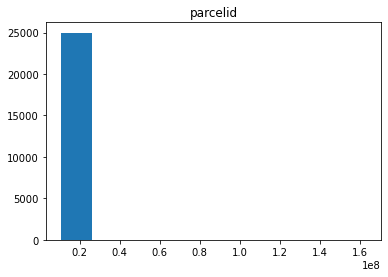

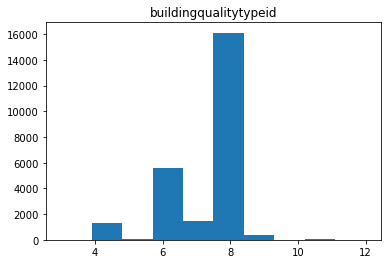

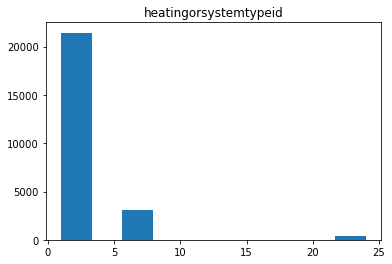

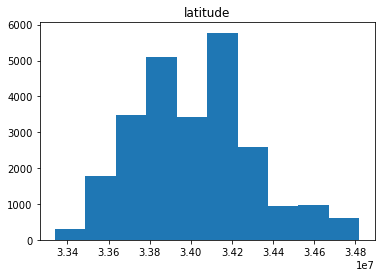

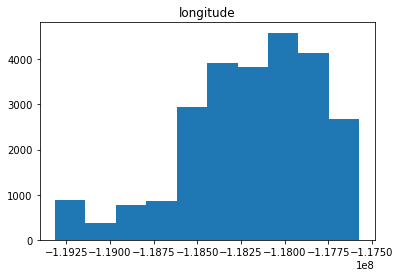

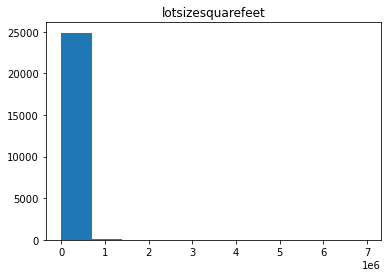

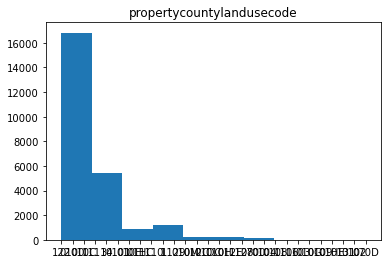

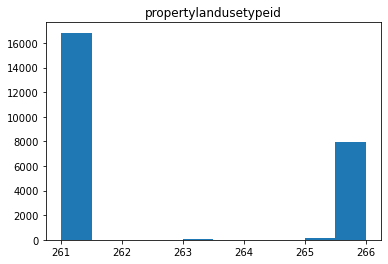

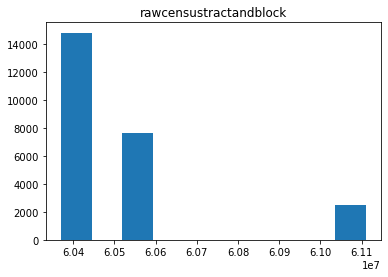

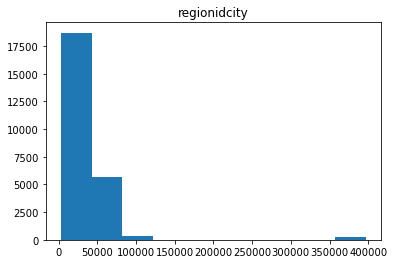

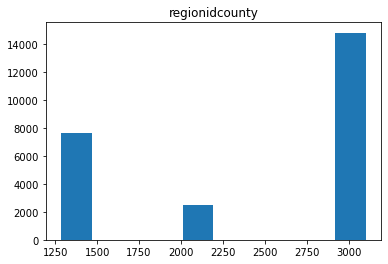

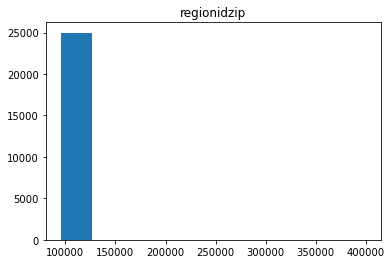

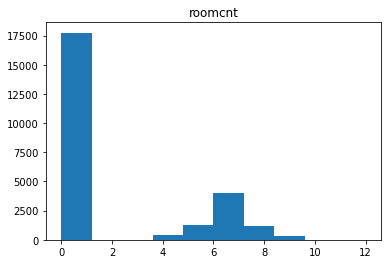

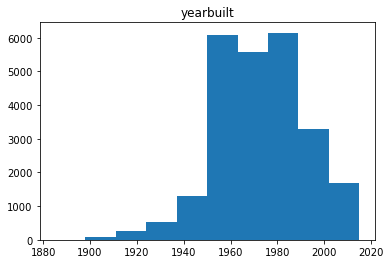

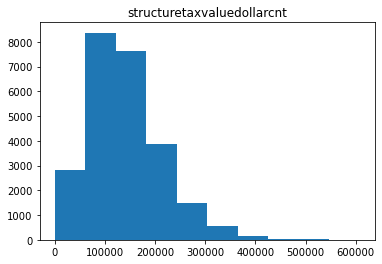

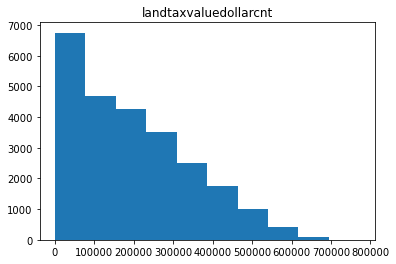

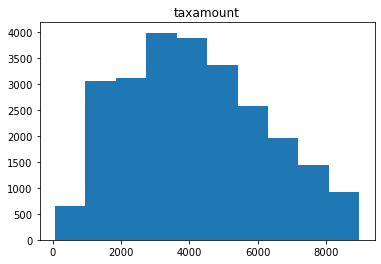

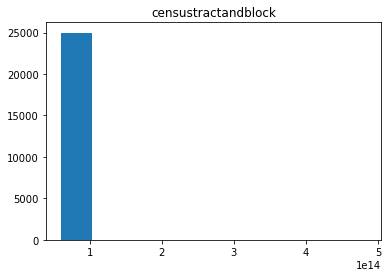

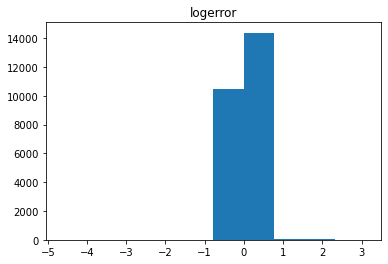

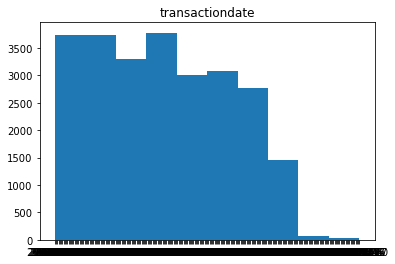

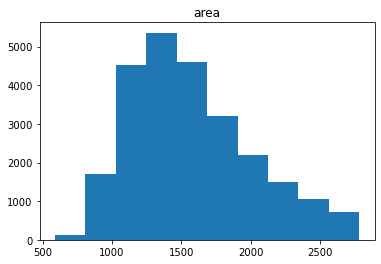

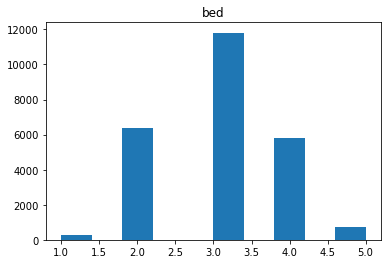

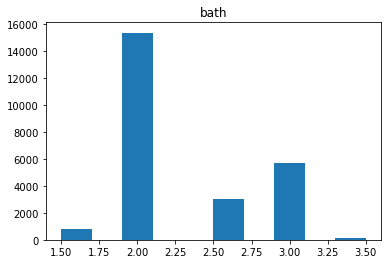

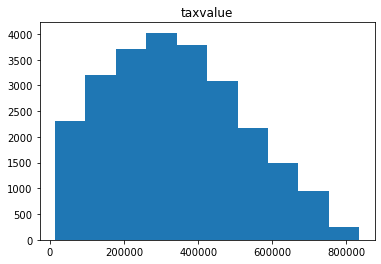

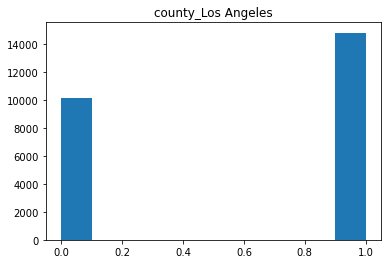

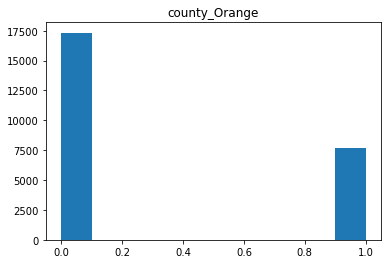

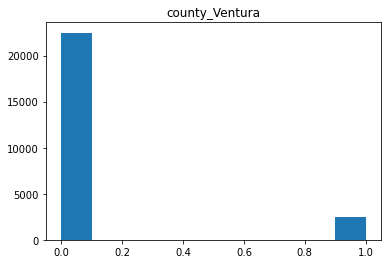

In [54]:
hist_dist(train)

# Takeaways
 - The following had normal distributions: longitude, latitude, taxamount, transactiondate, area, bed, and taxvalue
 - These columns could be of value when predicting log error
 - Log error ranges from -1 to 1

<AxesSubplot:>

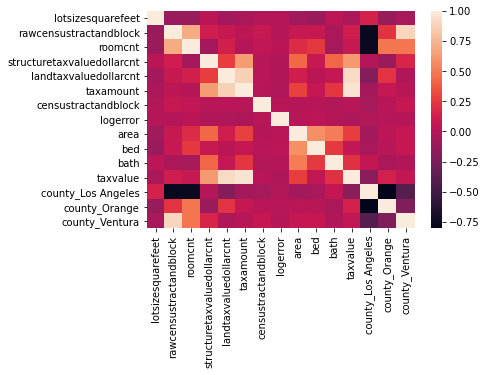

In [55]:
sns.heatmap(train.corr())

# Takeaways
 - high correlation between taxvalue and tax related columns like structuretaxvaluedollarcnt, landtaxvaluedollarcnt, taxamount

In [56]:
def logerror_uni(df, variable):
    '''
    explore_univariate will take in a dataframe, and one feature or variable. It graphs a box plot and a distribution 
    of the single variable.
    '''
    #set figure size, font for axis ticks
    plt.figure(figsize=(30,10))
    sns.relplot(variable, df.logerror, data =df)
    plt.title(f'Log Error and {variable}')

    plt.show()

<Figure size 2160x720 with 0 Axes>

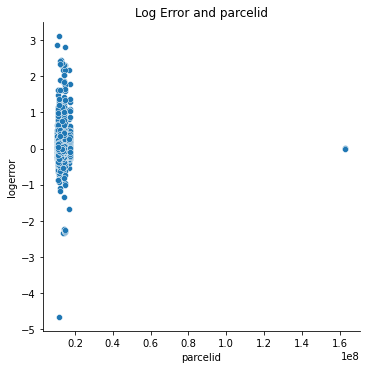

<Figure size 2160x720 with 0 Axes>

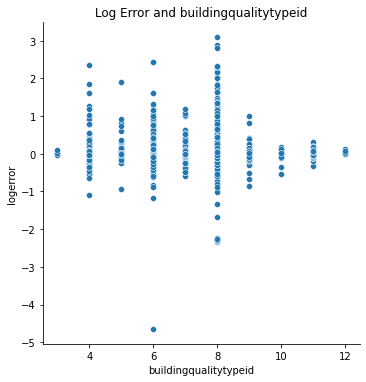

<Figure size 2160x720 with 0 Axes>

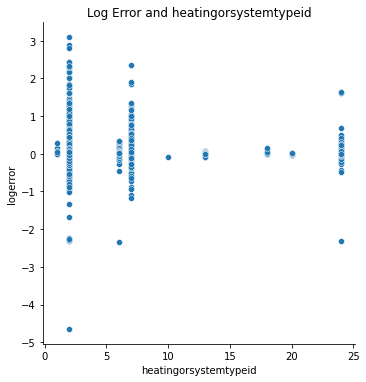

<Figure size 2160x720 with 0 Axes>

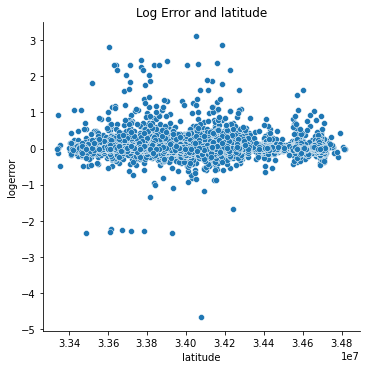

<Figure size 2160x720 with 0 Axes>

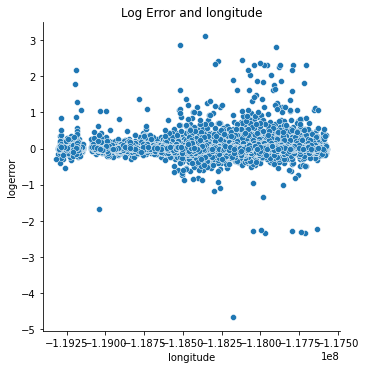

<Figure size 2160x720 with 0 Axes>

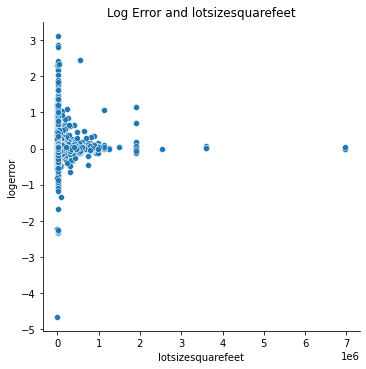

<Figure size 2160x720 with 0 Axes>

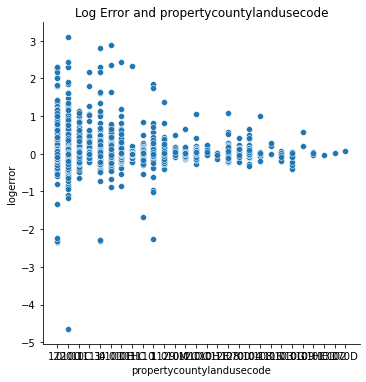

<Figure size 2160x720 with 0 Axes>

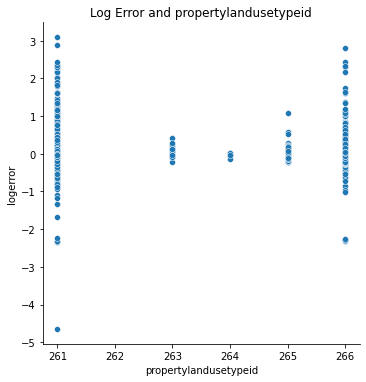

<Figure size 2160x720 with 0 Axes>

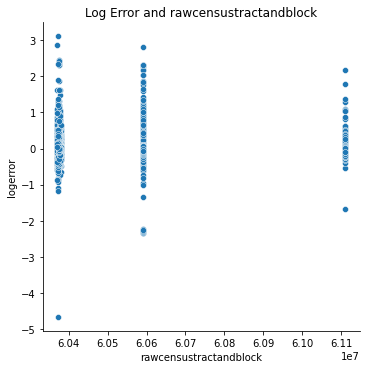

<Figure size 2160x720 with 0 Axes>

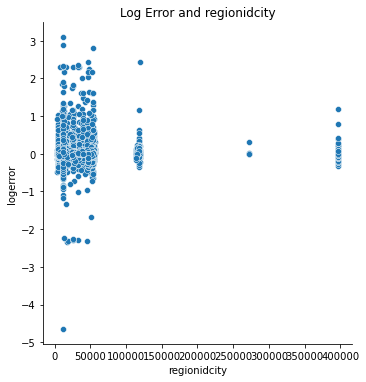

<Figure size 2160x720 with 0 Axes>

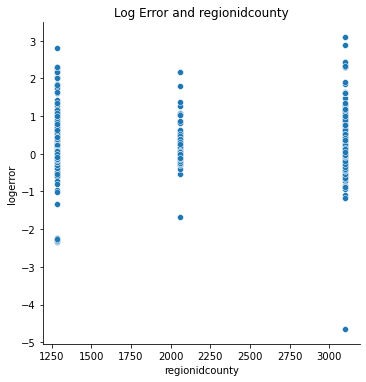

<Figure size 2160x720 with 0 Axes>

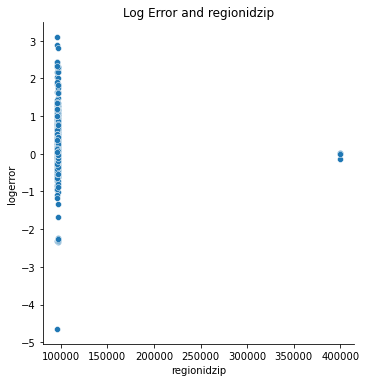

<Figure size 2160x720 with 0 Axes>

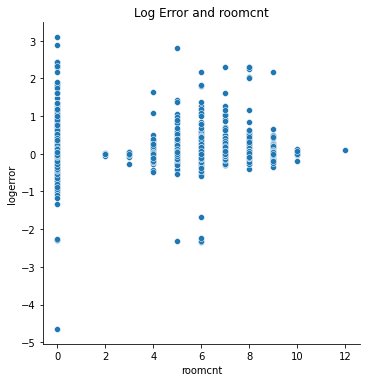

<Figure size 2160x720 with 0 Axes>

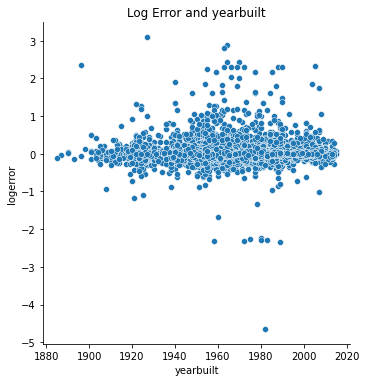

<Figure size 2160x720 with 0 Axes>

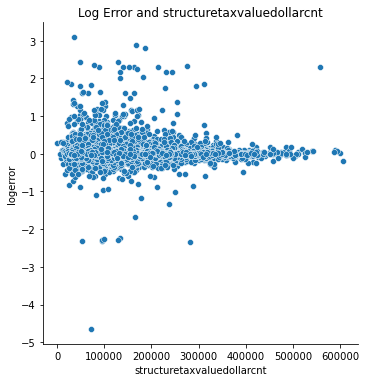

<Figure size 2160x720 with 0 Axes>

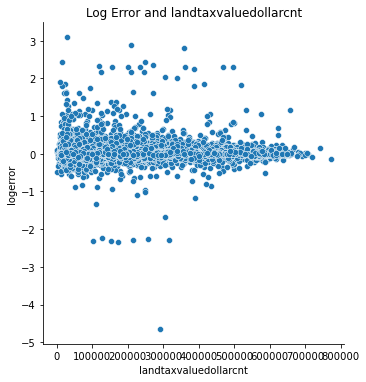

<Figure size 2160x720 with 0 Axes>

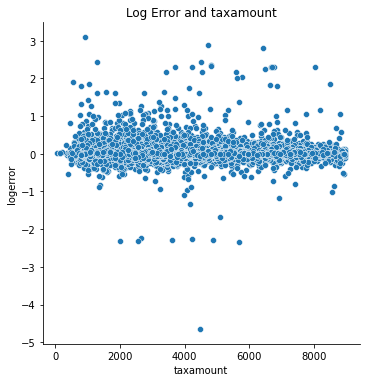

<Figure size 2160x720 with 0 Axes>

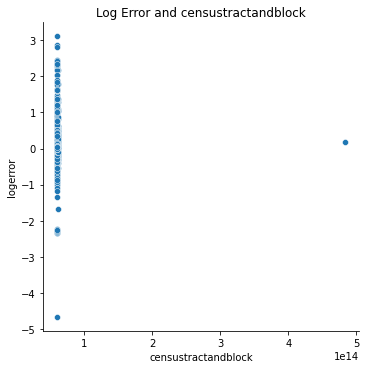

<Figure size 2160x720 with 0 Axes>

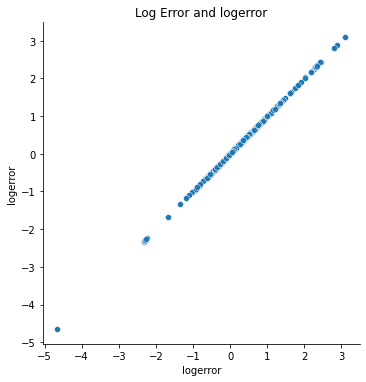

<Figure size 2160x720 with 0 Axes>

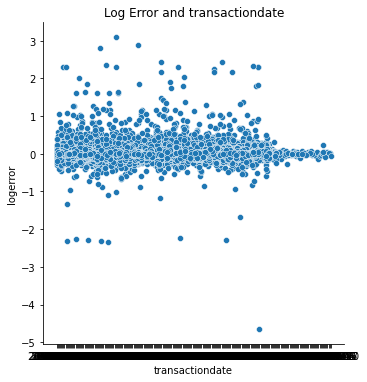

<Figure size 2160x720 with 0 Axes>

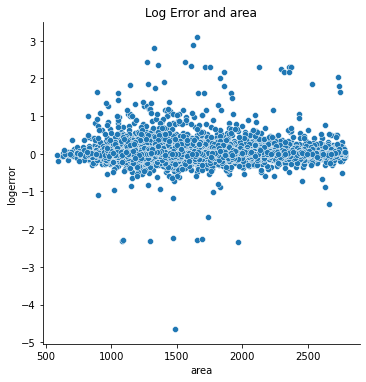

<Figure size 2160x720 with 0 Axes>

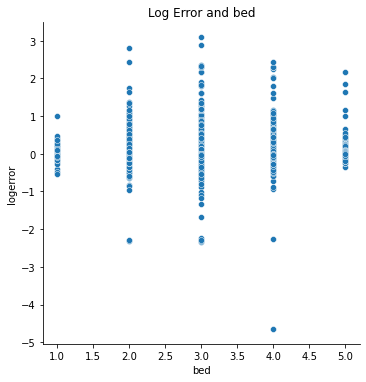

<Figure size 2160x720 with 0 Axes>

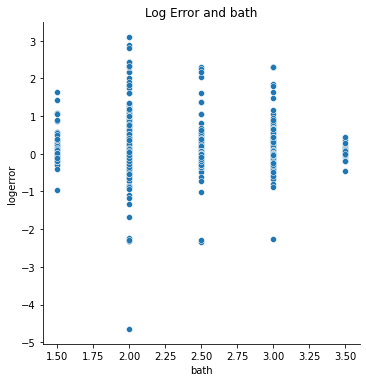

<Figure size 2160x720 with 0 Axes>

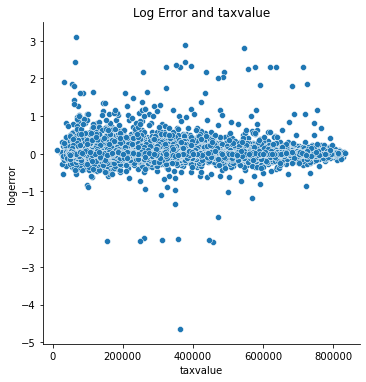

<Figure size 2160x720 with 0 Axes>

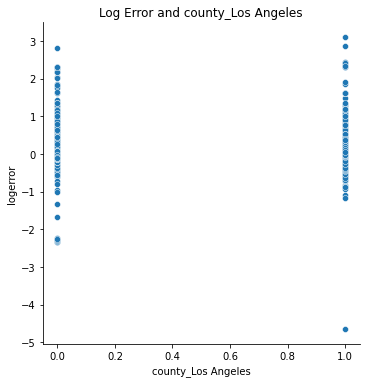

<Figure size 2160x720 with 0 Axes>

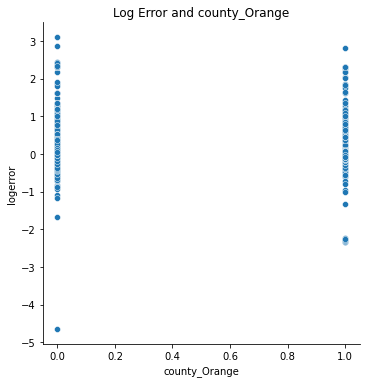

<Figure size 2160x720 with 0 Axes>

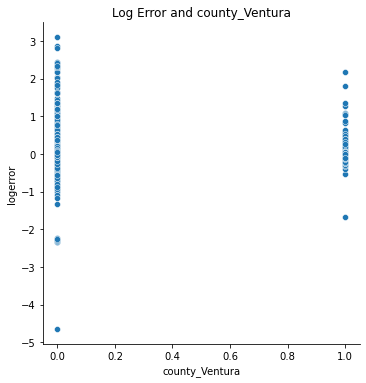

In [57]:
for i in df.columns:
    logerror_uni(train, i)

# Takeaways:
    - the following features have seemingly even plots: latitude, longitude, yearbuilt, and tax related features
    - As propertycountylandusecode increases, logerror approaches 0, but it may just be that higher codes are less frequently used. 

# Features to consider: 
- latitude, longitude, yearbuilt, taxamount, taxvalue, counties, area and bed

# Scaling

In [58]:
def add_scaled_columns(train, validate, test, scaler, columns_to_scale):
    '''Takes in df and scales the columns inputed and concats them to the dataframe '''    
    # new column names
    new_column_names = [c + '_scaled' for c in columns_to_scale]
    
    # Fit the scaler on the train
    scaler.fit(train[columns_to_scale])
    
    # transform train validate and test
    train = pd.concat([
        train,
        pd.DataFrame(scaler.transform(train[columns_to_scale]), columns=new_column_names, index=train.index),
    ], axis=1)
    
    validate = pd.concat([
        validate,
        pd.DataFrame(scaler.transform(validate[columns_to_scale]), columns=new_column_names, index=validate.index),
    ], axis=1)
    
    
    test = pd.concat([
        test,
        pd.DataFrame(scaler.transform(test[columns_to_scale]), columns=new_column_names, index=test.index),
    ], axis=1)
    
    return train, validate, test

In [65]:
train.columns

Index(['parcelid', 'buildingqualitytypeid', 'heatingorsystemtypeid',
       'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'propertylandusetypeid',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock', 'logerror',
       'transactiondate', 'area', 'bed', 'bath', 'taxvalue',
       'county_Los Angeles', 'county_Orange', 'county_Ventura'],
      dtype='object')

In [80]:
train, validate, test = add_scaled_columns(
    train,
    validate,
    test,
    scaler = StandardScaler(),
    columns_to_scale=['area',
                      'bed',
                      'yearbuilt',
                      'latitude',
                      'longitude',
                      'taxamount',
                      'taxvalue'])

In [81]:
train.head()

,parcelid,buildingqualitytypeid,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,area,bed,bath,taxvalue,county_Los Angeles,county_Orange,county_Ventura,area_scaled,bed_scaled,yearbuilt_scaled,latitude_scaled,longitude_scaled,taxamount_scaled,taxvalue_scaled
25071,14310544,8.00,2.00,"33,663,342.00","-117,809,786.00","3,000.00",122,261.00,"60,590,626.13","52,650.00","1,286.00","96,947.00",6.00,"1,972.00","90,724.00","509,112.00","6,146.08","60,590,626,125,001.00",0.01,2017-04-17,"1,215.00",3.00,2.00,"599,836.00",0,1,0,-0.82,-0.01,0.01,-1.25,1.01,0.97,1.44
53925,14174858,8.00,2.00,"33,902,491.00","-117,878,588.00","9,100.00",122,261.00,"60,590,117.07","24,812.00","1,286.00","97,043.00",8.00,"1,977.00","169,366.00","153,257.00","3,777.46","60,590,117,072,001.00",0.05,2017-07-17,"1,951.00",4.00,2.50,"322,623.00",0,1,0,0.85,1.23,0.27,-0.41,0.83,-0.20,-0.09
2640,14249707,8.00,2.00,"33,773,513.00","-117,855,910.00","7,345.00",122,261.00,"60,590,754.01","47,568.00","1,286.00","97,005.00",7.00,"1,962.00","113,388.00","233,916.00","3,932.86","60,590,754,011,001.00",0.04,2017-01-13,"1,708.00",4.00,2.50,"347,304.00",0,1,0,0.30,1.23,-0.52,-0.86,0.88,-0.12,0.04
2032,11206914,8.00,2.00,"34,577,511.00","-118,069,699.00","7,340.00",0100,261.00,"60,379,106.02","40,227.00","3,101.00","97,328.00",0.00,"1,990.00","167,800.00","55,900.00","3,610.43","60,379,106,021,012.00",0.53,2017-01-11,"1,733.00",3.00,3.00,"223,700.00",1,0,0,0.36,-0.01,0.95,1.99,0.32,-0.28,-0.64
26793,10935645,6.00,2.00,"34,181,779.00","-118,355,357.00","6,006.00",0100,261.00,"60,373,111.00","396,054.00","3,101.00","96,437.00",0.00,"1,939.00","38,565.00","36,005.00",848.82,"60,373,111,002,018.00",-0.01,2017-04-21,"1,316.00",3.00,2.00,"74,570.00",1,0,0,-0.59,-0.01,-1.72,0.59,-0.43,-1.63,-1.47


# Clusters

- area & bed
- yearbuilt & taxvalue
- longitude & latitude

# Area & Bed Cluster

In [83]:
def inertia_graph(X):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

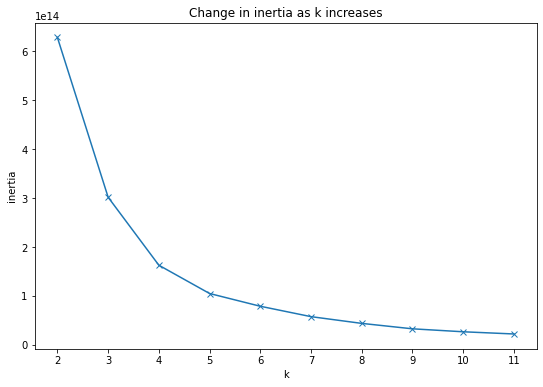

In [86]:
X = train[['area', 'latitude']]
inertia_graph(X)

In [87]:
def create_cluster(train, X, k, cluster_name):
    ''' Takes in df, X (dataframe with variables you want to cluster on), k number of clusters,
    and the name you want to name the column (enter column as string)
    It scales the X, calcuates the clusters and return train (with clusters), the Scaled dataframe,
    the scaler and kmeans object and unscaled centroids as a dataframe
    note: train_scaled enter the scaled train dataframe
    for X enter the dataframe of the two features for your cluster
    for k enter number of features
    for cluster_name enter name of the cluster column name you want as a string
    '''
    scaler = MinMaxScaler().fit(X)
    X = pd.DataFrame(scaler.transform(X), columns=X.columns.values).set_index([X.index.values])
    kmeans = KMeans(n_clusters = k, random_state = 66)
    kmeans.fit(X)
    kmeans.predict(X)
    train[cluster_name] = kmeans.predict(X)
    # train_scaled[cluster_name] = 'cluster_' + train_scaled[cluster_name].astype(str)
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
    return train, X, scaler, kmeans, centroids

In [90]:

# k=4 looks to be 45 degrees

# name the cluster column
cluster_name = 'area_bed_cluster'

# make five clusters
k = 4

# create a cluster column
X = train[['area_scaled', 'bed_scaled']]
train, X, scaler, kmeans, centroids = create_cluster(train, X, k, cluster_name)


# create the same clusters for validate
X = validate[['area_scaled', 'bed_scaled']]
validate, X, scaler, kmeans, centroids = create_cluster(validate, X, k, cluster_name)


# create the same clusters for test
X = test[['area_scaled', 'bed_scaled']]
test, X, scaler, kmeans, centroids = create_cluster(test, X, k, cluster_name)

# create a scaled column for the cluster using min max scaling
train, validate, test = add_scaled_columns(
    train,
    validate,
    test,
    scaler= MinMaxScaler(),
    columns_to_scale=['area_bed_cluster'])
train.shape, validate.shape, test.shape

((24985, 36), (10709, 36), (8924, 36))

In [96]:
def plot_clusters(x ,y, cluster_col_name, df , kmeans, scaler, centroids):
    
    """ Takes in x and y (variable names as strings, along with returned objects from previous
    function create_cluster and creates a plot"""
    # set palette to zillow colors
    zpalette = ['#1277e1', '#f3ad35', '#0b449c', '#5289e4', '#c3eafb']

    # set figsize
    plt.figure(figsize=(15, 15))
    
    # scatterplot the clusters 
    sns.scatterplot(x = x, y = y, data = df, hue = cluster_col_name, cmap = zpalette)
    
    # plot the centroids as Xs
    centroids.plot.scatter(y=y, x= x, ax=plt.gca(), alpha=.60, s=500, c='black', marker = 'x')

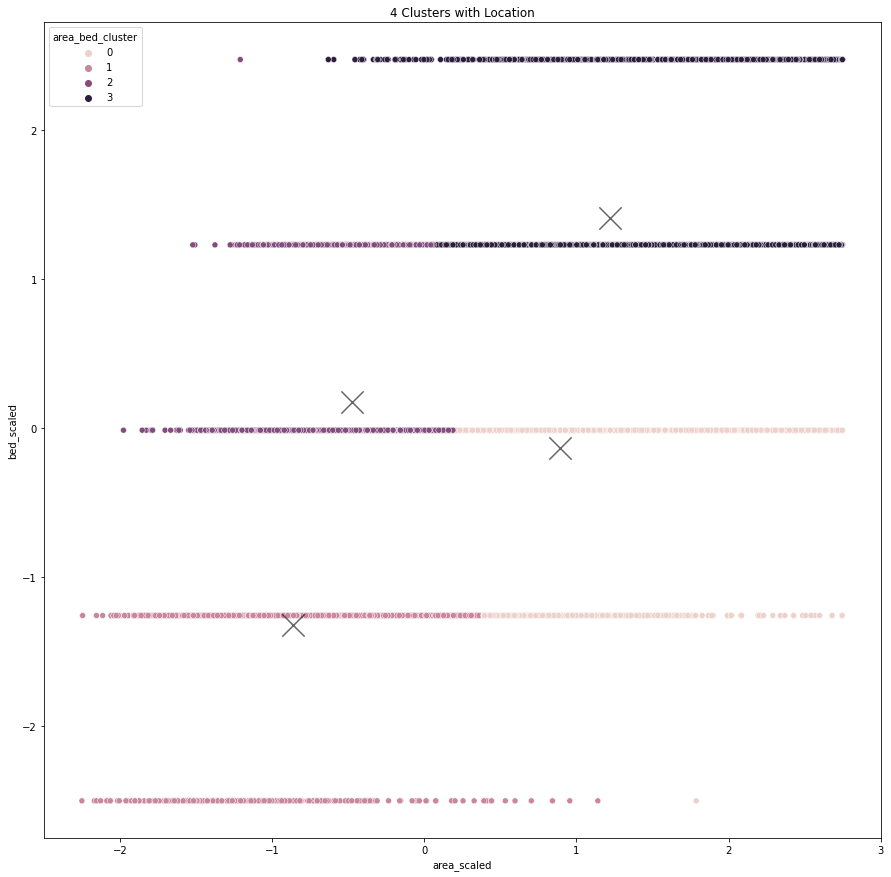

In [97]:

# Plot the area and bed clusters
plot_clusters('area_scaled', 'bed_scaled', 'area_bed_cluster', train, kmeans, scaler, centroids)
plt.title('4 Clusters with Location')
plt.show()


# Takeaways:
- Area and beds are not great indicators for clusters. 

# Yearbuilt and Tax Value Cluster

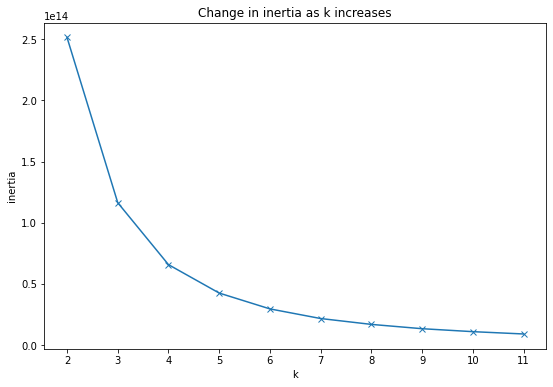

In [98]:
X = train[['yearbuilt', 'taxvalue']]
inertia_graph(X)

In [101]:

# k=4 looks to be 45 degrees

# name the cluster column
cluster_name = 'year_tax_cluster'

# make five clusters
k = 4

# create a cluster column
X = train[['yearbuilt_scaled', 'taxvalue_scaled']]
train, X, scaler, kmeans, centroids = create_cluster(train, X, k, cluster_name)


# create the same clusters for validate
X = validate[['yearbuilt_scaled', 'taxvalue_scaled']]
validate, X, scaler, kmeans, centroids = create_cluster(validate, X, k, cluster_name)


# create the same clusters for test
X = test[['yearbuilt_scaled', 'taxvalue_scaled']]
test, X, scaler, kmeans, centroids = create_cluster(test, X, k, cluster_name)

# create a scaled column for the cluster using min max scaling
train, validate, test = add_scaled_columns(
    train,
    validate,
    test,
    scaler= MinMaxScaler(),
    columns_to_scale=['year_tax_cluster'])
train.shape, validate.shape, test.shape

((24985, 40), (10709, 40), (8924, 40))

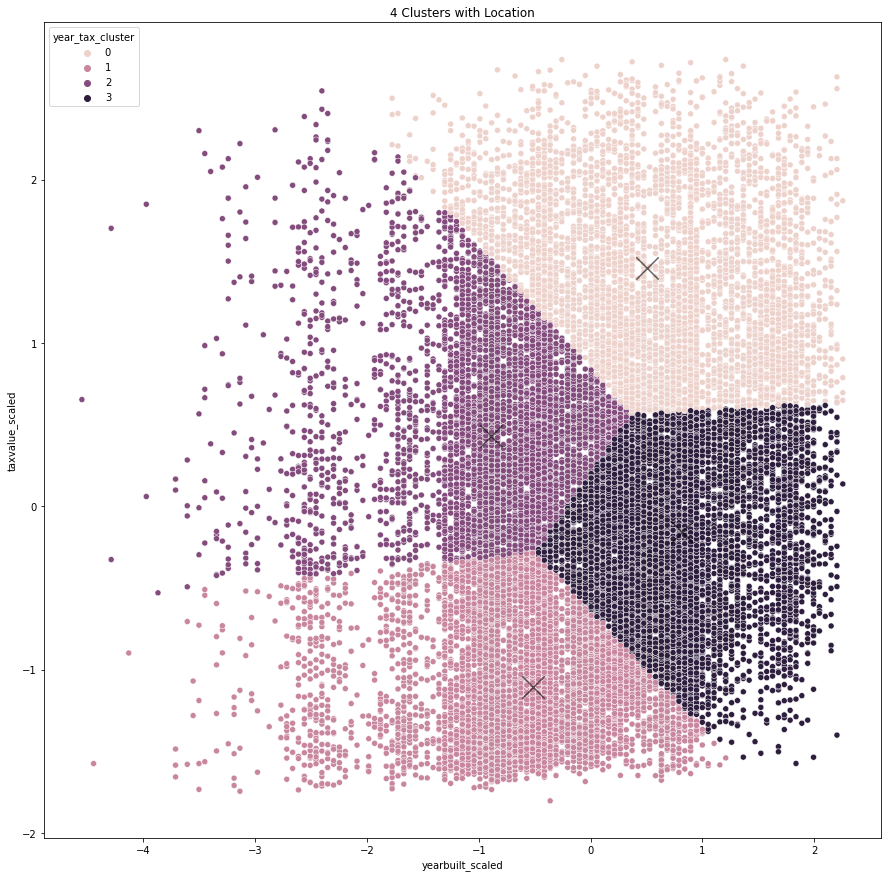

In [103]:

# Plot the latitude and longitude clusters
plot_clusters('yearbuilt_scaled', 'taxvalue_scaled', 'year_tax_cluster', train, kmeans, scaler, centroids)
plt.title('4 Clusters with Location')
plt.show()

# Takeaways:
- This looks a bit more promising, but the clusters are still very close together. 
- There seems to be no definite point of seperation. 

# Longitude and Latitude Cluster

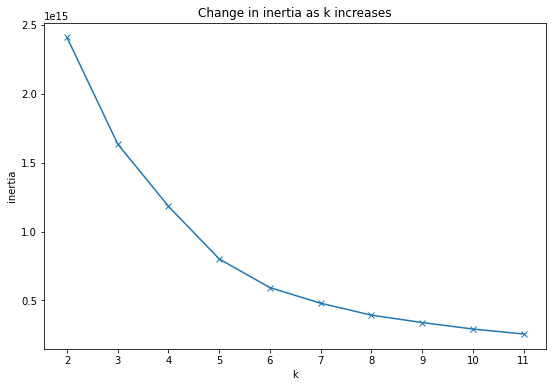

In [104]:
X = train[['longitude', 'latitude']]
inertia_graph(X)

In [105]:

# k=5 looks to be 45 degrees

# name the cluster column
cluster_name = 'long_lat_cluster'

# make five clusters
k = 5

# create a cluster column
X = train[['longitude_scaled', 'latitude_scaled']]
train, X, scaler, kmeans, centroids = create_cluster(train, X, k, cluster_name)


# create the same clusters for validate
X = validate[['longitude_scaled', 'latitude_scaled']]
validate, X, scaler, kmeans, centroids = create_cluster(validate, X, k, cluster_name)


# create the same clusters for test
X = test[['longitude_scaled', 'latitude_scaled']]
test, X, scaler, kmeans, centroids = create_cluster(test, X, k, cluster_name)

# create a scaled column for the cluster using min max scaling
train, validate, test = add_scaled_columns(
    train,
    validate,
    test,
    scaler= MinMaxScaler(),
    columns_to_scale=['long_lat_cluster'])
train.shape, validate.shape, test.shape

((24985, 42), (10709, 42), (8924, 42))

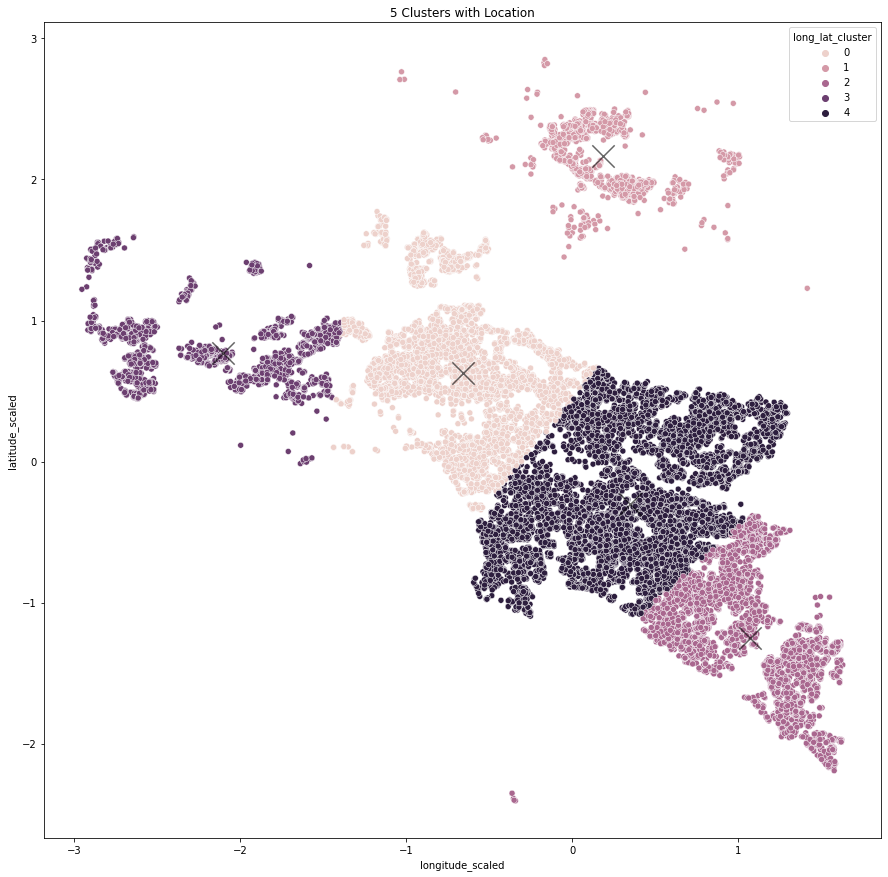

In [106]:
# Plot the latitude and longitude clusters
plot_clusters('longitude_scaled', 'latitude_scaled', 'long_lat_cluster', train, kmeans, scaler, centroids)
plt.title('5 Clusters with Location')
plt.show()

# Takeaways:
- This group of clusters appears to be the most convincing. 
- Total of 5 groups, with 3 of the 5 groups being relatively close to each other. 